# First model test

In [62]:
# libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [63]:
df = pd.read_csv('../data/processed/meme.csv')
print(df.shape)
df.head()

(33039, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
0,1681689600,3.141154e-08,7.951914e-08,2.818250e-08,6.526480e-08,9.040237e+06,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
1,1681776000,6.485267e-08,2.276132e-07,5.598800e-08,1.878306e-07,3.246056e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2,1681862400,1.862740e-07,3.796318e-07,1.379781e-07,2.647504e-07,5.639813e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
3,1681948800,2.648534e-07,4.051020e-07,2.291480e-07,2.945193e-07,4.044670e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
4,1682035200,2.949180e-07,3.114699e-07,1.605779e-07,1.985193e-07,3.242627e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme


In [64]:
token_df = df.groupby('name').get_group('Dogecoin')
print(token_df.shape)
token_df.head()

(3701, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
14621,1409011200,0.000151,0.000151,0.000151,0.000151,18.376441,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
14622,1409184000,0.000139,0.000139,0.000139,0.000139,104.302676,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
14623,1409270400,0.000139,0.000142,0.000127,0.000127,168.897599,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
14624,1409443200,0.000128,0.000130,0.000128,0.000130,44.749007,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
14625,1409529600,0.000128,0.000135,0.000128,0.000130,71.984732,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme


In [65]:
token_df.index = pd.to_datetime(token_df['timestamp'], unit='s')
token_df.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
timestamp,,,,,,,,,,
2014-08-26,1409011200,0.000151,0.000151,0.000151,0.000151,18.376441,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
2014-08-28,1409184000,0.000139,0.000139,0.000139,0.000139,104.302676,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
2014-08-29,1409270400,0.000139,0.000142,0.000127,0.000127,168.897599,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
2014-08-31,1409443200,0.000128,0.000130,0.000128,0.000130,44.749007,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme
2014-09-01,1409529600,0.000128,0.000135,0.000128,0.000130,71.984732,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme


In [66]:
close_df = pd.DataFrame({'close': token_df['close']})
close_df['Seconds'] = close_df.index.map(pd.Timestamp.timestamp)
close_df.head()

,close,Seconds
timestamp,,
2014-08-26,0.000151,1.409011e+09
2014-08-28,0.000139,1.409184e+09
2014-08-29,0.000127,1.409270e+09
2014-08-31,0.000130,1.409443e+09
2014-09-01,0.000130,1.409530e+09


In [67]:
day = 60 * 60 * 24
week = 7 * day
year = 365.2425 * day

close_df['Week sin'] = np.sin(close_df['Seconds'] * (2 * np.pi / week))
close_df['Week cos'] = np.cos(close_df['Seconds'] * (2 * np.pi / week))
close_df['Year sin'] = np.sin(close_df['Seconds'] * (2 * np.pi / year))
close_df['Year cos'] = np.cos(close_df['Seconds'] * (2 * np.pi / year))

close_df.head()

,close,Seconds,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,,
2014-08-26,0.000151,1.409011e+09,-9.749279e-01,-0.222521,-0.808231,-0.588865
2014-08-28,0.000139,1.409184e+09,2.393333e-13,1.000000,-0.828009,-0.560714
2014-08-29,0.000127,1.409270e+09,7.818315e-01,0.623490,-0.837532,-0.546388
2014-08-31,0.000130,1.409443e+09,4.338837e-01,-0.900969,-0.855832,-0.517255
2014-09-01,0.000130,1.409530e+09,-4.338837e-01,-0.900969,-0.864603,-0.502456


In [68]:
close_df = close_df.drop(columns=['Seconds'])
close_df.head()

,close,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,
2014-08-26,0.000151,-9.749279e-01,-0.222521,-0.808231,-0.588865
2014-08-28,0.000139,2.393333e-13,1.000000,-0.828009,-0.560714
2014-08-29,0.000127,7.818315e-01,0.623490,-0.837532,-0.546388
2014-08-31,0.000130,4.338837e-01,-0.900969,-0.855832,-0.517255
2014-09-01,0.000130,-4.338837e-01,-0.900969,-0.864603,-0.502456


In [69]:
def df_to_X_y(df, window_size=20):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [70]:
X2, y2 = df_to_X_y(close_df)
X2.shape, y2.shape

((3681, 20, 5), (3681,))

In [71]:
X2_train, y2_train = X2[:3300], y2[:3300]
X2_val, y2_val = X2[3300:3500], y2[3300:3500]
X2_test, y2_test = X2[3500:], y2[3500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3300, 20, 5), (3300,), (200, 20, 5), (200,), (181, 20, 5), (181,))

In [72]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [73]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 2.15660326e+00,  7.81831482e-01,  6.23489802e-01,
          9.98284319e-01,  5.85526988e-02],
        [ 1.98190637e+00,  9.74927912e-01, -2.22520934e-01,
          9.99143828e-01,  4.13716195e-02],
        [ 2.24295575e+00,  4.33883739e-01, -9.00968868e-01,
          9.99707662e-01,  2.41782972e-02],
        ...,
        [ 1.50722133e+00, -4.33883739e-01, -9.00968868e-01,
          9.72778918e-01, -2.31735143e-01],
        [ 1.44256187e+00, -9.74927912e-01, -2.22520934e-01,
          9.68648690e-01, -2.48434528e-01],
        [ 1.33774810e+00, -7.81831482e-01,  6.23489802e-01,
          9.64231812e-01, -2.65060395e-01]],

       [[ 1.98190637e+00,  9.74927912e-01, -2.22520934e-01,
          9.99143828e-01,  4.13716195e-02],
        [ 2.24295575e+00,  4.33883739e-01, -9.00968868e-01,
          9.99707662e-01,  2.41782972e-02],
        [ 2.05732447e+00, -4.33883739e-01, -9.00968868e-01,
          9.99975655e-01,  6.97781983e-03],
        ...,
        [ 1.44256187e+00, -9.7492791

In [74]:
model = Sequential()
model.add(InputLayer((6, 5)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
cp = ModelCheckpoint('model/model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [76]:
model.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp])

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0095 - root_mean_squared_error: 0.0952 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 7.1326e-04 - val_root_mean_squared_error: 0.0267
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4372e-04 - root_mean_squared_error: 0.0232 - val_loss: 4.3205e-04 - val_root_mean_squared_error: 0.0208
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2197e-04 - root_mean_squared_error: 0.0204 - val_loss: 3.3958e-04 - val_root_mean_squared_error: 0.0184
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5921e-04 - root_mean_squared_error: 0.0161 - val_loss: 2.4817e-04 - val_root_mean_squared_error: 0.0158
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9797e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.5661e-04 - val_root_mean_squared_error: 0.0160
Epoch 7/10
104/1

In [77]:
def plot_predictions(model, X, y):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  return df, mse(y, predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


(     Predictions   Actuals
 0       0.138495  0.152317
 1       0.141860  0.156372
 2       0.147581  0.162688
 3       0.154570  0.158271
 4       0.158214  0.161264
 ..           ...       ...
 176     0.127886  0.110740
 177     0.124877  0.111395
 178     0.119711  0.111354
 179     0.123687  0.116647
 180     0.129584  0.115598
 
 [181 rows x 2 columns],
 0.00025470162118030394)

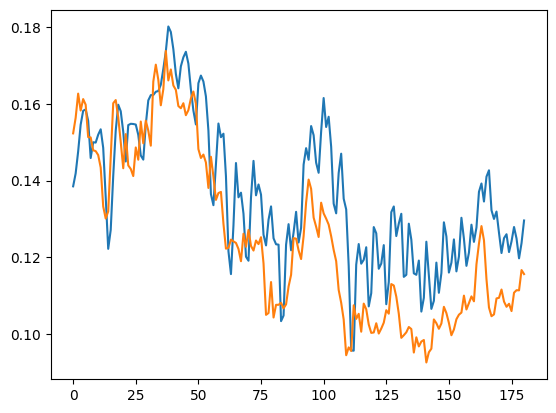

In [78]:
plot_predictions(model, X2_test, y2_test)

In [79]:
v_close_df = pd.concat([token_df['high'], close_df], axis=1)
v_close_df.head()

,high,close,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,,
2014-08-26,0.000151,0.000151,-9.749279e-01,-0.222521,-0.808231,-0.588865
2014-08-28,0.000139,0.000139,2.393333e-13,1.000000,-0.828009,-0.560714
2014-08-29,0.000142,0.000127,7.818315e-01,0.623490,-0.837532,-0.546388
2014-08-31,0.000130,0.000130,4.338837e-01,-0.900969,-0.855832,-0.517255
2014-09-01,0.000135,0.000130,-4.338837e-01,-0.900969,-0.864603,-0.502456


In [80]:
def df_to_X_y3(df, window_size=15):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [81]:
X3, y3 = df_to_X_y3(v_close_df)
X3.shape, y3.shape

((3686, 15, 6), (3686, 2))

In [82]:
X3_train, y3_train = X3[:3300], y3[:3300]
X3_val, y3_val = X3[3300:3500], y3[3300:3500]
X3_test, y3_test = X3[3500:], y3[3500:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((3300, 15, 6), (3300, 2), (200, 15, 6), (200, 2), (186, 15, 6), (186, 2))

In [83]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [84]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [85]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[1.55492   , 1.39988063],
       [1.42367704, 1.5214861 ],
       [1.47443788, 1.5076942 ],
       [1.39679904, 1.44303935],
       [1.3545665 , 1.33823305],
       [1.30043156, 1.39625778],
       [1.3351155 , 1.44695388],
       [1.42798639, 1.52591961],
       [1.43743098, 1.47068746],
       [1.4087485 , 1.5081125 ],
       [1.40222246, 1.48972405],
       [1.41831981, 1.38407284],
       [1.30019725, 1.38300181],
       [1.27337934, 1.34102906],
       [1.24654846, 1.33832308],
       [1.28454067, 1.32551215],
       [1.23193886, 1.28472737],
       [1.2052156 , 1.15784351],
       [1.06321382, 1.1185318 ],
       [1.06899732, 1.14183676],
       [1.22922761, 1.31819796],
       [1.47990519, 1.49454564],
       [1.40998951, 1.50493818],
       [1.47452915, 1.44849843],
       [1.36796944, 1.36759825],
       [1.27515167, 1.2824671 ],
       [1.29933383, 1.39385009],
       [1.296967  , 1.29169307],
       [1.20878619, 1.28019814],
       [1.1874117 , 1.25693626],
       [1.

In [86]:
model5 = Sequential()
model5.add(InputLayer((15, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
cp5 = ModelCheckpoint('model5/model.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [88]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0829 - root_mean_squared_error: 1.0366 - val_loss: 0.6880 - val_root_mean_squared_error: 0.8295
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6957 - root_mean_squared_error: 0.8312 - val_loss: 0.1842 - val_root_mean_squared_error: 0.4291
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2841 - root_mean_squared_error: 0.5311 - val_loss: 0.0838 - val_root_mean_squared_error: 0.2894
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1612 - root_mean_squared_error: 0.4006 - val_loss: 0.0566 - val_root_mean_squared_error: 0.2380
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1385 - root_mean_squared_error: 0.3700 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2094
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0899 - root_mean_squared_error: 0.2963 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1981
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 

In [89]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  v_preds, close_preds = predictions[:, 0], predictions[:, 1]
  v_actuals, close_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Close Predictions': close_preds,
                          'Close Actuals':close_actuals,
                          'Volume Predictions': v_preds,
                          'Volume Actuals': v_actuals
                          })
  plt.plot(df['Close Predictions'][start:end])
  plt.plot(df['Close Actuals'][start:end])
  plt.plot(df['Volume Predictions'][start:end])
  plt.plot(df['Volume Actuals'][start:end])
  return df[start:end]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Close Predictions,Close Actuals,Volume Predictions,Volume Actuals
0,1.799898,1.399881,1.841715,1.554920
1,1.736564,1.521486,1.795633,1.423677
2,1.668459,1.507694,1.746162,1.474438
3,1.611870,1.443039,1.710089,1.396799
4,1.557446,1.338233,1.668826,1.354567
...,...,...,...,...
95,0.788065,1.014421,0.860207,0.992357
96,0.819578,0.986175,0.887424,0.947064
97,0.860005,1.061134,0.920981,0.973043
98,0.908345,1.170753,0.958315,1.086366


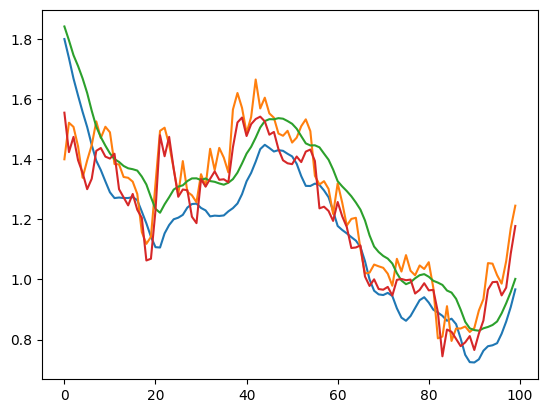

In [90]:
plot_predictions2(model5, X3_test, y3_test)

In [91]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [92]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.184602,0.152607,0.200388,0.175850
1,0.179536,0.162334,0.196445,0.164621
2,0.174089,0.161231,0.192212,0.168964
3,0.169563,0.156059,0.189126,0.162321
4,0.165210,0.147676,0.185595,0.158708
...,...,...,...,...
95,0.103672,0.121777,0.116411,0.127717
96,0.106192,0.119518,0.118739,0.123842
97,0.109426,0.125513,0.121610,0.126065
98,0.113292,0.134281,0.124805,0.135761


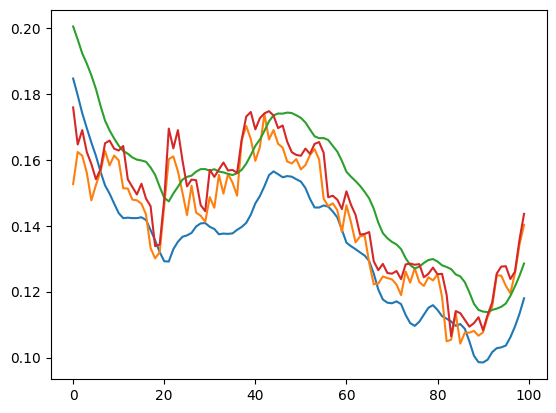

In [93]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

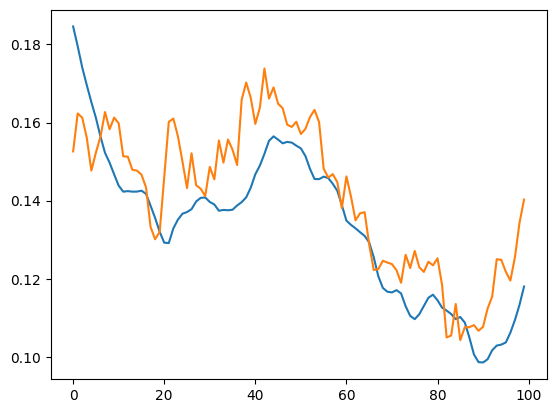

In [94]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

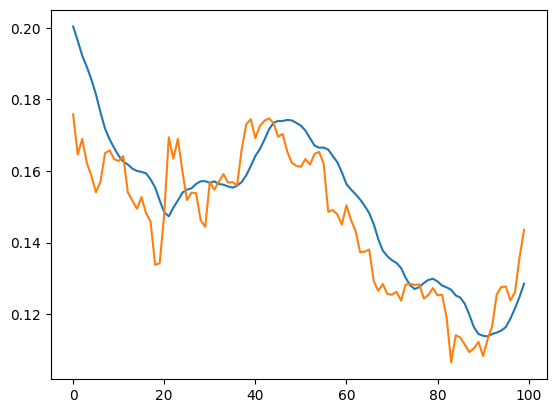

In [95]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [96]:
model6 = Sequential()
model6.add(InputLayer((15, 6)))
model6.add(GRU(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,362 (56.10 KB)

 Trainable params: 14,362 (56.10 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
cp6 = ModelCheckpoint('model6/model.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [98]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=20, callbacks=[cp6])

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8583 - root_mean_squared_error: 0.9247 - val_loss: 0.2163 - val_root_mean_squared_error: 0.4650
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3617 - root_mean_squared_error: 0.5994 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1810
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1285 - root_mean_squared_error: 0.3580 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1681
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1089 - root_mean_squared_error: 0.3281 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0492 - root_mean_squared_error: 0.2207 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1802
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0396 - root_mean_squared_error: 0.1974 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.195576,0.152607,0.201661,0.175850
1,0.182865,0.162334,0.184397,0.164621
2,0.170693,0.161231,0.171147,0.168964
3,0.163546,0.156059,0.165914,0.162321
4,0.157822,0.147676,0.161527,0.158708
...,...,...,...,...
95,0.122119,0.121777,0.130545,0.127717
96,0.124389,0.119518,0.132495,0.123842
97,0.124311,0.125513,0.132198,0.126065
98,0.125250,0.134281,0.132748,0.135761


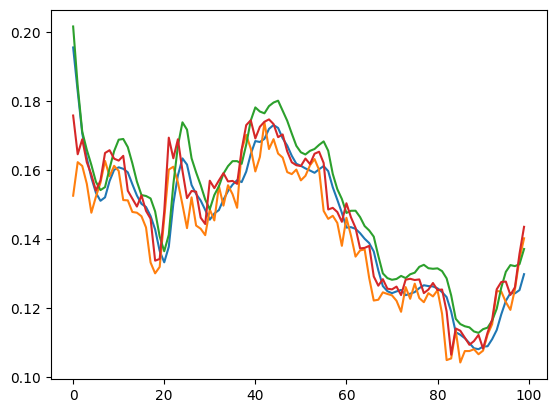

In [99]:
plot_predictions2(model6, X3_test, y3_test)

In [100]:
token_df2 = df.groupby('name').get_group('Pepe')
print(token_df2.shape)
token_df2.head()

(548, 10)


,timestamp,open,high,low,close,volume,name,symbol,id,category
0,1681689600,3.141154e-08,7.951914e-08,2.818250e-08,6.526480e-08,9.040237e+06,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
1,1681776000,6.485267e-08,2.276132e-07,5.598800e-08,1.878306e-07,3.246056e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2,1681862400,1.862740e-07,3.796318e-07,1.379781e-07,2.647504e-07,5.639813e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
3,1681948800,2.648534e-07,4.051020e-07,2.291480e-07,2.945193e-07,4.044670e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
4,1682035200,2.949180e-07,3.114699e-07,1.605779e-07,1.985193e-07,3.242627e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme


In [102]:
token_df2.index = pd.to_datetime(token_df2['timestamp'], unit='s')
token_df2.head()

,timestamp,open,high,low,close,volume,name,symbol,id,category
timestamp,,,,,,,,,,
2023-04-17,1681689600,3.141154e-08,7.951914e-08,2.818250e-08,6.526480e-08,9.040237e+06,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2023-04-18,1681776000,6.485267e-08,2.276132e-07,5.598800e-08,1.878306e-07,3.246056e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2023-04-19,1681862400,1.862740e-07,3.796318e-07,1.379781e-07,2.647504e-07,5.639813e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2023-04-20,1681948800,2.648534e-07,4.051020e-07,2.291480e-07,2.945193e-07,4.044670e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme
2023-04-21,1682035200,2.949180e-07,3.114699e-07,1.605779e-07,1.985193e-07,3.242627e+07,Pepe,PEPE,02e9c2cc-2e3b-45fe-b7bb-508cb23a3a39,meme


In [103]:
close_df = pd.DataFrame({'close': token_df2['close']})
close_df['Seconds'] = close_df.index.map(pd.Timestamp.timestamp)
close_df.head()

,close,Seconds
timestamp,,
2023-04-17,6.526480e-08,1.681690e+09
2023-04-18,1.878306e-07,1.681776e+09
2023-04-19,2.647504e-07,1.681862e+09
2023-04-20,2.945193e-07,1.681949e+09
2023-04-21,1.985193e-07,1.682035e+09


In [104]:
day = 60 * 60 * 24
week = 7 * day
year = 365.2425 * day

close_df['Week sin'] = np.sin(close_df['Seconds'] * (2 * np.pi / week))
close_df['Week cos'] = np.cos(close_df['Seconds'] * (2 * np.pi / week))
close_df['Year sin'] = np.sin(close_df['Seconds'] * (2 * np.pi / year))
close_df['Year cos'] = np.cos(close_df['Seconds'] * (2 * np.pi / year))

close_df.head()

,close,Seconds,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,,
2023-04-17,6.526480e-08,1.681690e+09,-4.338837e-01,-0.900969,0.967604,-0.252473
2023-04-18,1.878306e-07,1.681776e+09,-9.749279e-01,-0.222521,0.963118,-0.269081
2023-04-19,2.647504e-07,1.681862e+09,-7.818315e-01,0.623490,0.958346,-0.285608
2023-04-20,2.945193e-07,1.681949e+09,-1.624524e-13,1.000000,0.953292,-0.302051
2023-04-21,1.985193e-07,1.682035e+09,7.818315e-01,0.623490,0.947955,-0.318405


In [105]:
close_df = close_df.drop(columns=['Seconds'])
close_df.head()

,close,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,
2023-04-17,6.526480e-08,-4.338837e-01,-0.900969,0.967604,-0.252473
2023-04-18,1.878306e-07,-9.749279e-01,-0.222521,0.963118,-0.269081
2023-04-19,2.647504e-07,-7.818315e-01,0.623490,0.958346,-0.285608
2023-04-20,2.945193e-07,-1.624524e-13,1.000000,0.953292,-0.302051
2023-04-21,1.985193e-07,7.818315e-01,0.623490,0.947955,-0.318405


In [107]:
v_close_df = pd.concat([token_df2['high'], close_df], axis=1)
v_close_df.head()

,high,close,Week sin,Week cos,Year sin,Year cos
timestamp,,,,,,
2023-04-17,7.951914e-08,6.526480e-08,-4.338837e-01,-0.900969,0.967604,-0.252473
2023-04-18,2.276132e-07,1.878306e-07,-9.749279e-01,-0.222521,0.963118,-0.269081
2023-04-19,3.796318e-07,2.647504e-07,-7.818315e-01,0.623490,0.958346,-0.285608
2023-04-20,4.051020e-07,2.945193e-07,-1.624524e-13,1.000000,0.953292,-0.302051
2023-04-21,3.114699e-07,1.985193e-07,7.818315e-01,0.623490,0.947955,-0.318405


In [108]:
X3, y3 = df_to_X_y3(v_close_df)
X3.shape, y3.shape

((533, 15, 6), (533, 2))

In [109]:
X3_train, y3_train = X3[:500], y3[:500]
X3_val, y3_val = X3[500:515], y3[500:515]
X3_test, y3_test = X3[515:], y3[515:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((500, 15, 6), (500, 2), (15, 15, 6), (15, 2), (18, 15, 6), (18, 2))

In [110]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

In [111]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [112]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[1.53869817, 1.65084508],
       [1.62707292, 1.62751949],
       [1.52872389, 1.4372548 ],
       [1.51563881, 1.25934697],
       [1.26954064, 1.15186854],
       [1.09730958, 1.01246223],
       [1.11359623, 1.18828383],
       [1.11367711, 1.178365  ],
       [1.27211735, 1.38446151],
       [1.37663162, 1.28246186],
       [1.21442397, 1.21392947],
       [1.17111831, 1.12191162],
       [1.08060044, 1.1634193 ],
       [1.18849045, 1.26901481],
       [1.2545406 , 1.30826802],
       [1.19777075, 1.25764625],
       [1.42868969, 1.53768534],
       [1.4513865 , 1.422991  ]])

In [113]:
model7 = Sequential()
model7.add(InputLayer((15, 6)))
model7.add(GRU(64))
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))

model7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 64)             │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,362 (56.10 KB)

 Trainable params: 14,362 (56.10 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
cp7 = ModelCheckpoint('model7/model.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [117]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=20, callbacks=[cp7])

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0339 - root_mean_squared_error: 0.1838 - val_loss: 0.0735 - val_root_mean_squared_error: 0.2711
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - root_mean_squared_error: 0.1984 - val_loss: 0.0731 - val_root_mean_squared_error: 0.2704
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - root_mean_squared_error: 0.1810 - val_loss: 0.0744 - val_root_mean_squared_error: 0.2727
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - root_mean_squared_error: 0.1739 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323 - root_mean_squared_error: 0.1795 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2734
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0383 - root_mean_squared_error: 0.1952 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2749
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.000009,0.000011,0.000009,0.000012
1,0.000009,0.000011,0.000010,0.000012
2,0.000009,0.000010,0.000010,0.000011
3,0.000010,0.000010,0.000010,0.000011
4,0.000010,0.000009,0.000011,0.000010
5,0.000010,0.000009,0.000011,0.000010
6,0.000010,0.000009,0.000011,0.000010
7,0.000010,0.000009,0.000011,0.000010
8,0.000010,0.000010,0.000011,0.000010
9,0.000010,0.000010,0.000011,0.000011


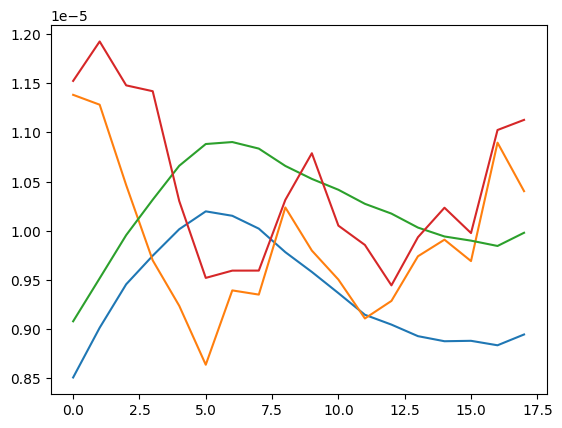

In [118]:
plot_predictions2(model5, X3_test, y3_test)